## Code And Explanation (Analysis)

Credit scoring to improve the state of art and predict the probability of default.
Credit scoring can be done in two ways; Model building and Score card Method.
The score method gives a score to each Ids based on feature binning. 

Because we need to generate probability, a classification model will be used.

First step: I installed and imported all the necessary libraries that will be needed to get this project done.

#### Installing Libraries and Importing them for use

In [105]:
#Importing Libraries needed
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings         
warnings.filterwarnings('ignore')     #This is to prevent warning messages from displaying

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

##### Reading the data into a pandas dataframe

In [2]:
train_data = pd.read_csv('cs-training.csv')
test_data = pd.read_csv('cs-test.csv')

In [3]:
train_data.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
train_data.shape

(150000, 12)

### Data Preprocessing

In [5]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
column_names = train_data.columns
print(column_names)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [7]:
train_data.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

##### We detect and remove the outliers in the data to ensure our data is fit

In [8]:
def find_outliers(train_data,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for columns in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[columns], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[columns],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = train_data[(train_data[columns] < Q1 - outlier_step) | (train_data[columns] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = find_outliers(train_data,2,["RevolvingUtilizationOfUnsecuredLines",
                                            "age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "DebtRatio",
                                            "MonthlyIncome",
                                            "NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "Unnamed: 0",
                                            "NumberOfDependents"])

In [9]:
#Detecting outliers
train_data.loc[Outliers_to_drop]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
900,901,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN
1958,1959,0,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0
4852,4853,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
5956,5957,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
6251,6252,1,1.481038,26,0,22.000000,NaN,1,0,0,1,0.0
6703,6704,0,1.421927,50,1,0.058003,4085.0,2,0,0,1,2.0
6907,6908,0,1.548094,24,0,37.000000,NaN,3,0,0,2,NaN
7079,7080,0,1.485050,66,1,1049.000000,NaN,3,0,0,0,0.0
7352,7353,1,1.650560,35,1,1596.000000,NaN,13,0,0,0,2.0


In [10]:
#Removing detected outliers
train_data = train_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [11]:
train_data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           28249
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3766
dtype: int64

Renaming the datasets is necessary as it allows for easy readability and understanding of the data points with shorter names

In [12]:
train_data = train_data.rename(columns={'Unnamed: 0': 'Id',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnSecuredLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late30_59',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'RE_Lines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late60_89',
                                  'NumberOfDependents': 'Dependents'})

test_data = test_data.rename(columns={'Unnamed: 0': 'Id',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnSecuredLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late30_59',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'RE_Lines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late60_89',
                                  'NumberOfDependents': 'Dependents'})

## Data Exploratory

This basically gives an overview of the entire datasets, this will allow for further exploratory analysis of the data set and deepened understanding of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20c70908>,
      dtype=object)

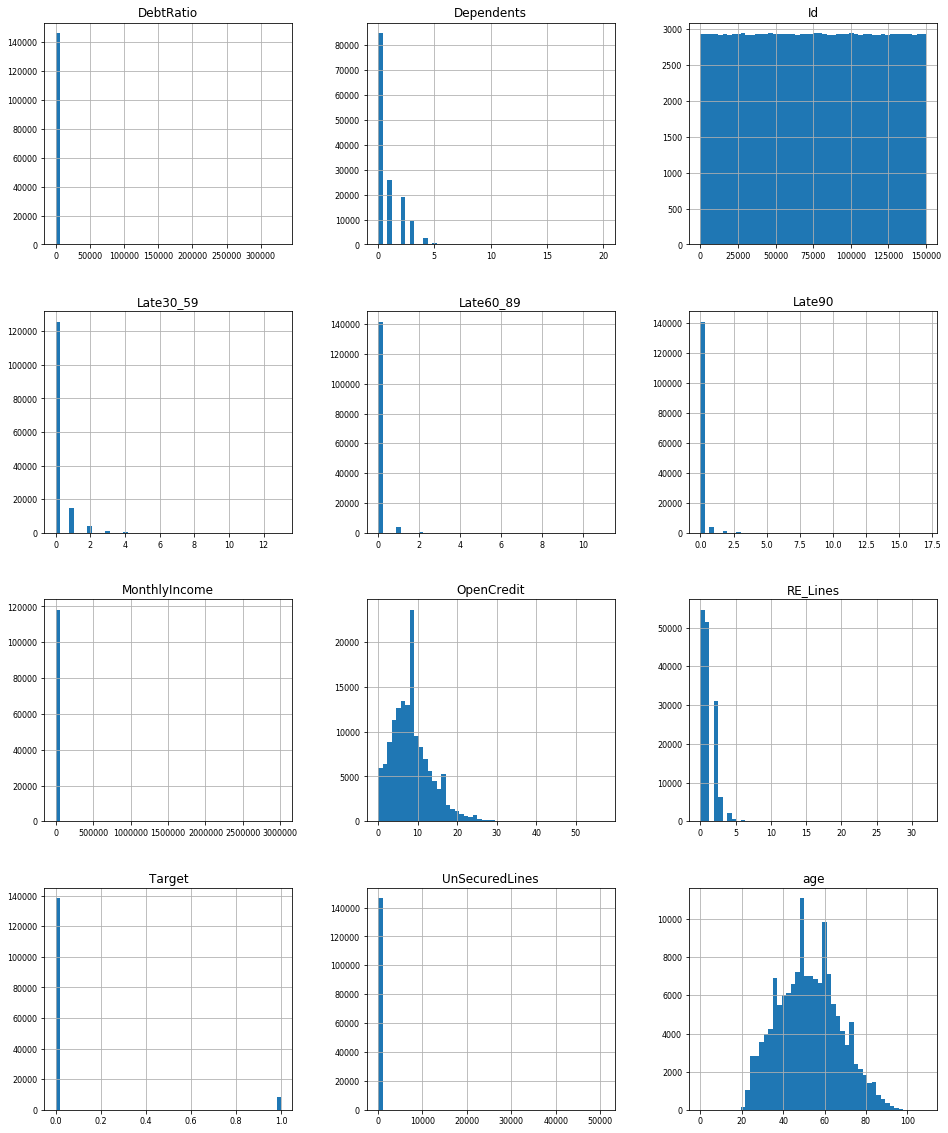

In [13]:
train_data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

After looking through the datasets, is it obvious that there are outliers and NaN values, we can then go further to detect these outliers and remove them.

The full train and test datasets is concatenated, so that the larger dataset can be worked on, although the model will still be test on the test data.

In [14]:
#Merging Datasets
data =  pd.concat(objs=[train_data, test_data], axis=0).reset_index(drop=True)

In [15]:
data.head(10)

,Id,Target,UnSecuredLines,age,Late30_59,DebtRatio,MonthlyIncome,OpenCredit,Late90,RE_Lines,Late60_89,Dependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0.0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0.0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0.0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0.0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0.0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [16]:
data.isnull().sum()

Id                     0
Target            101503
UnSecuredLines         0
age                    0
Late30_59              0
DebtRatio              0
MonthlyIncome      48352
OpenCredit             0
Late90                 0
RE_Lines               0
Late60_89              0
Dependents          6392
dtype: int64

In [17]:
data.shape

(247976, 12)

The NaN values are removed using sklearn imputer. Since the NAN values are a lot and we cannot drop them all, as this will affect the dataset and our prediction in the long run. It is better to fill these empty values with strategies like the mean, median, top value or lower value.

I would be using the median strategy of the affected columns to fill these NAN rows.

In [19]:
#dealing with NANS
imp1 = Imputer(missing_values='NaN',strategy = 'median', axis = 0)
imp2 = Imputer(missing_values='NaN',strategy = 'median', axis = 0)
imp3 = Imputer(missing_values='NaN',strategy = 'median', axis = 0)

imp1.fit(data['Target'].values.reshape(-1,1))
data['Target']=imp1.transform(data['Target'].values.reshape(-1,1))
imp2.fit(data['MonthlyIncome'].values.reshape(-1,1))
data['MonthlyIncome']=imp2.transform(data['MonthlyIncome'].values.reshape(-1,1))
imp3.fit(data['Dependents'].values.reshape(-1,1))
data['Dependents']=imp3.transform(data['Dependents'].values.reshape(-1,1))

The NAN values have been removed as seen below.

In [20]:
data.isnull().sum()

Id                0
Target            0
UnSecuredLines    0
age               0
Late30_59         0
DebtRatio         0
MonthlyIncome     0
OpenCredit        0
Late90            0
RE_Lines          0
Late60_89         0
Dependents        0
dtype: int64

The variables are then explored, this is to show how closely correlated a variable is to another variable. 
The Heat map is most suitable for this.


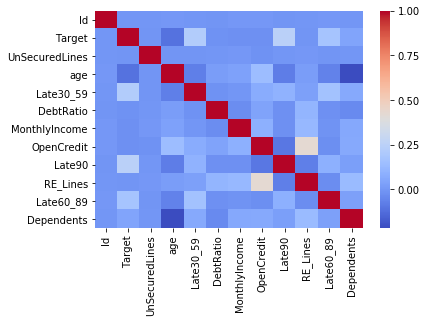

In [21]:
#Exploring variables
g = sns.heatmap(train_data.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

We can see from the above chart, the correlation among the varibles of the datasets.

All the variables are then explored, also a qcut is performed on all the variables, this groups the datasets, to prevent wide range of values and also remove outliers.

In [25]:
data['UnSecuredLines'].describe()

count    247976.000000
mean          5.678007
std         229.111400
min           0.000000
25%           0.029372
50%           0.148802
75%           0.544452
max       50708.000000
Name: UnSecuredLines, dtype: float64

In [28]:
data['UnSecuredLines'] = pd.qcut(data.UnSecuredLines.values, 5).codes

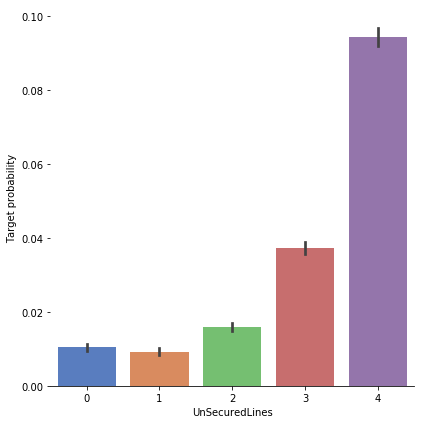

In [30]:
# Explore UnSecuredLines feature vs Target
g  = sns.factorplot(x="UnSecuredLines",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

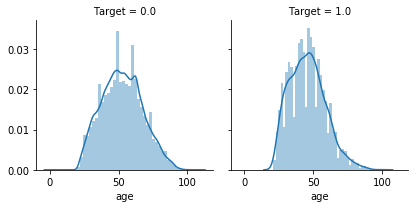

In [32]:
# Explore Age vs Survived
g = sns.FacetGrid(data, col='Target')
g = g.map(sns.distplot, "age")

In [33]:
data['age'] = pd.qcut(data.age.values, 5).codes

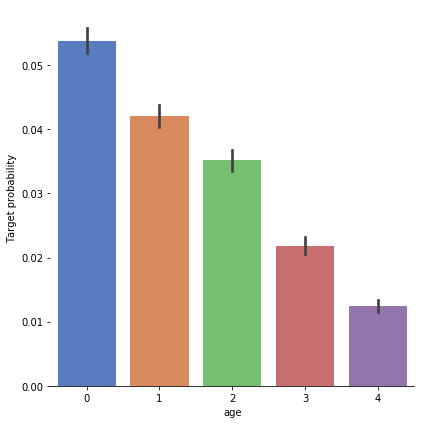

In [34]:
# Explore age feature vs Target
g  = sns.factorplot(x="age",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

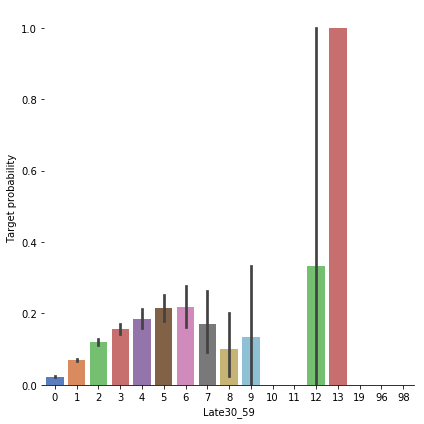

In [37]:
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="Late30_59",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")


In [39]:
for i in range(len(data)):
    if data.Late30_59[i] >= 6:
        data.Late30_59[i] = 6

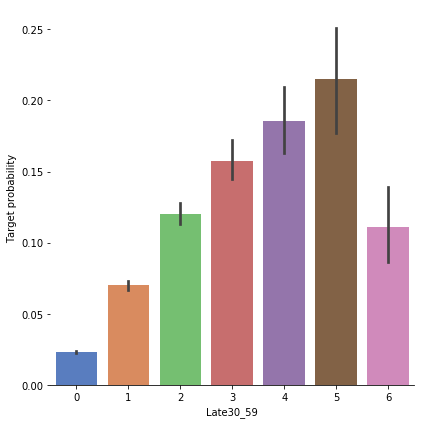

In [40]:
# Explore UnSecuredLines feature vs Target
g  = sns.factorplot(x="Late30_59",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

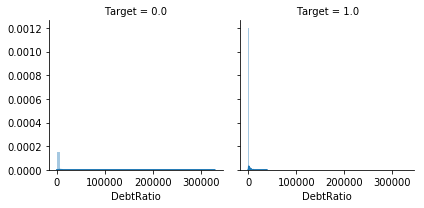

In [41]:
# Explore Age vs Survived
g = sns.FacetGrid(data, col='Target')
g = g.map(sns.distplot, "DebtRatio")

In [44]:
data['DebtRatio'] = pd.qcut(data.DebtRatio.values, 5).codes

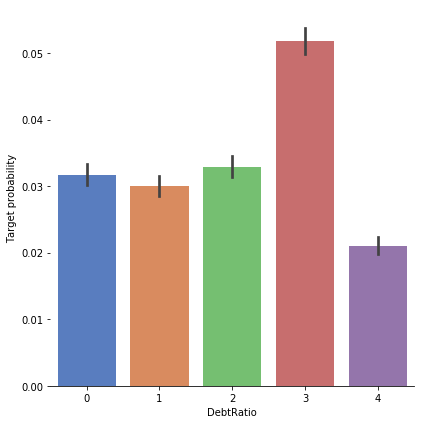

In [46]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="DebtRatio",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [47]:
data['MonthlyIncome'] = pd.qcut(data.MonthlyIncome.values, 5).codes

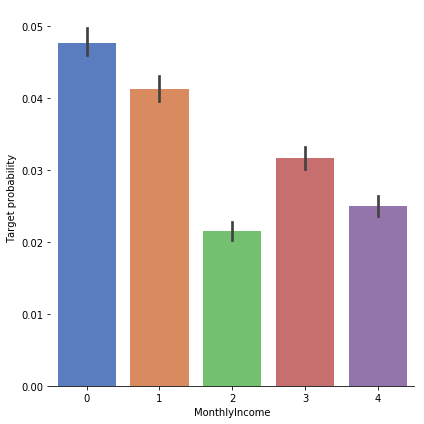

In [48]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="MonthlyIncome",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [49]:
data['MonthlyIncome'].isnull().sum()

0

In [51]:
data.OpenCredit.describe()

count    247976.000000
mean          8.457516
std           5.109915
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: OpenCredit, dtype: float64

In [54]:
data['OpenCredit'] = pd.qcut(data.OpenCredit.values, 5).codes

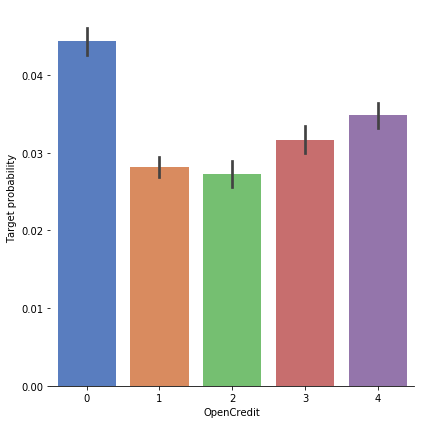

In [55]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="OpenCredit",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

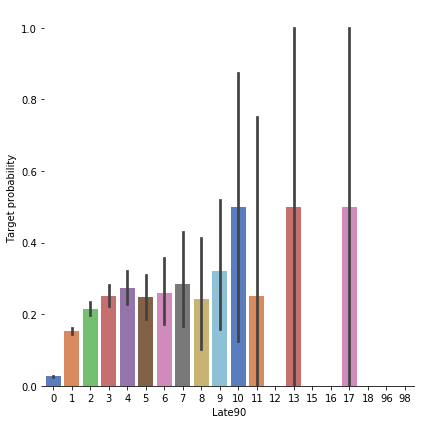

In [56]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Late90",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [57]:
for i in range(len(data)):
    if data.Late90[i] >= 5:
        data.Late90[i] = 5

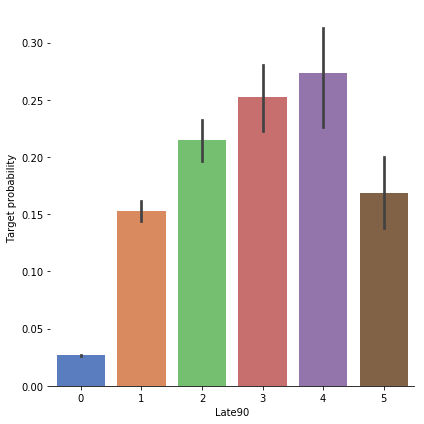

In [59]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Late90",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [62]:
data['RE_Lines'].describe()

count    247976.000000
mean          1.013703
std           1.092993
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          37.000000
Name: RE_Lines, dtype: float64

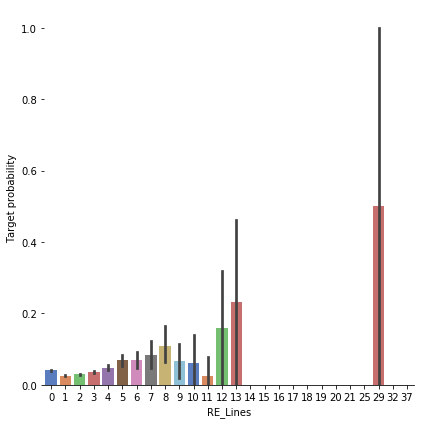

In [63]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="RE_Lines",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [65]:
for i in range(len(data)):
    if data.RE_Lines[i] >= 6:
        data.RE_Lines[i] = 6

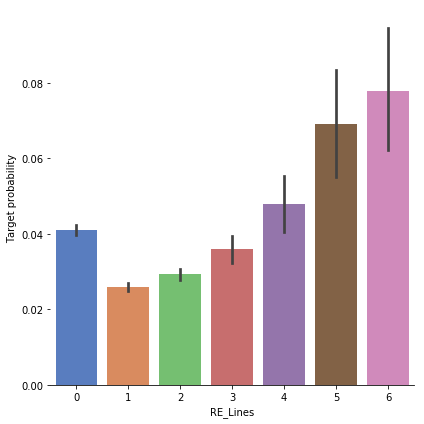

In [66]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="RE_Lines",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

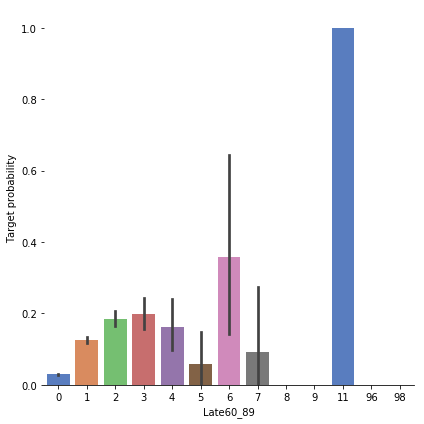

In [67]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late60_89",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [68]:
for i in range(len(data)):
    if data.Late60_89[i] >= 3:
        data.Late60_89[i] = 3

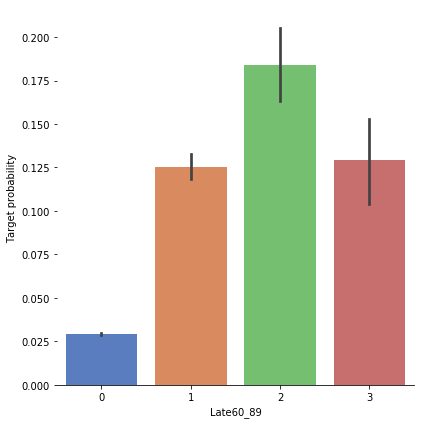

In [69]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late60_89",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [71]:
data.Dependents.describe()

count    247976.000000
mean          0.741931
std           1.115179
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          43.000000
Name: Dependents, dtype: float64

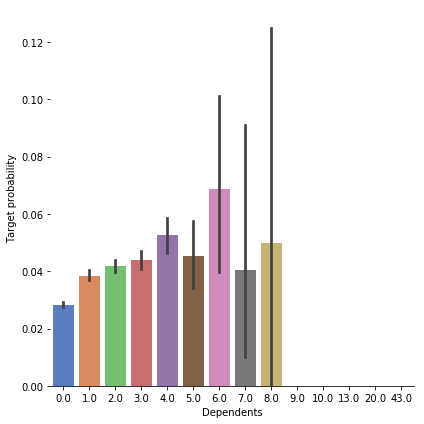

In [72]:
g  = sns.factorplot(x="Dependents",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [73]:
for i in range(len(data)):
    if data.Dependents[i] >= 4:
        data.Dependents[i] = 4

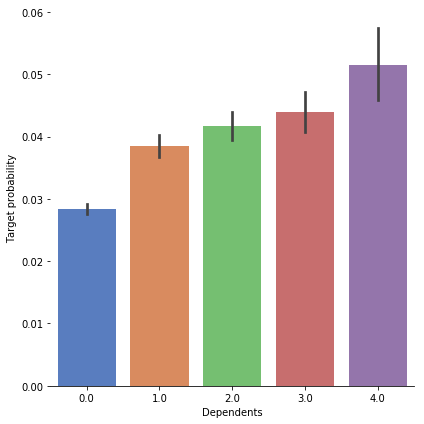

In [74]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Dependents",y="Target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [75]:
data.head(5)

,Id,Target,UnSecuredLines,age,Late30_59,DebtRatio,MonthlyIncome,OpenCredit,Late90,RE_Lines,Late60_89,Dependents
0,1,1.0,4,1,2,3,4,4,0,6,0,2.0
1,2,0.0,4,1,0,0,0,0,0,0,0,1.0
2,3,0.0,3,0,1,0,0,0,1,0,0,0.0
3,4,0.0,2,0,0,0,0,1,0,0,0,0.0
4,5,0.0,4,2,1,0,4,1,0,1,0,0.0


#### We create a binary of all our datasets with dummy variables

In [76]:
data = pd.get_dummies(data, columns = ["UnSecuredLines"], prefix="UnSecuredLines")
data = pd.get_dummies(data, columns = ["age"], prefix="age")
data = pd.get_dummies(data, columns = ["Late30_59"], prefix="Late30_59")
data = pd.get_dummies(data, columns = ["DebtRatio"], prefix="DebtRatio")
data = pd.get_dummies(data, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
data = pd.get_dummies(data, columns = ["OpenCredit"], prefix="OpenCredit")
data = pd.get_dummies(data, columns = ["Late90"], prefix="Late90")
data = pd.get_dummies(data, columns = ["RE_Lines"], prefix="RE_Lines")
data = pd.get_dummies(data, columns = ["Late60_89"], prefix="Late60_89")
data = pd.get_dummies(data, columns = ["Dependents"], prefix="Dependents")

In [77]:
data.head(5)

,Id,Target,UnSecuredLines_0,UnSecuredLines_1,UnSecuredLines_2,UnSecuredLines_3,UnSecuredLines_4,age_0,age_1,age_2,...,RE_Lines_6,Late60_89_0,Late60_89_1,Late60_89_2,Late60_89_3,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Dependents_4.0
0,1,1.0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,2,0.0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3,0.0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,0.0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,0.0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [78]:
data.shape

(247976, 56)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247976 entries, 0 to 247975
Data columns (total 56 columns):
Id                  247976 non-null int64
Target              247976 non-null float64
UnSecuredLines_0    247976 non-null uint8
UnSecuredLines_1    247976 non-null uint8
UnSecuredLines_2    247976 non-null uint8
UnSecuredLines_3    247976 non-null uint8
UnSecuredLines_4    247976 non-null uint8
age_0               247976 non-null uint8
age_1               247976 non-null uint8
age_2               247976 non-null uint8
age_3               247976 non-null uint8
age_4               247976 non-null uint8
Late30_59_0         247976 non-null uint8
Late30_59_1         247976 non-null uint8
Late30_59_2         247976 non-null uint8
Late30_59_3         247976 non-null uint8
Late30_59_4         247976 non-null uint8
Late30_59_5         247976 non-null uint8
Late30_59_6         247976 non-null uint8
DebtRatio_0         247976 non-null uint8
DebtRatio_1         247976 non-null uint8
DebtR

### Model Selection

We create a machine learning model that would predict probabilties of default.

Firstly we divide the data to train and test sets, while ensuring it's the same size with the iniial test and train data.

In [133]:
#spliting the datasets
train_len = 146473
train_data = data[:train_len]
test_data = data[train_len:]
test_data.drop(labels=["Target"],axis = 1,inplace=True)

In [134]:
train_data.isnull().sum()

Id                  0
Target              0
UnSecuredLines_0    0
UnSecuredLines_1    0
UnSecuredLines_2    0
UnSecuredLines_3    0
UnSecuredLines_4    0
age_0               0
age_1               0
age_2               0
age_3               0
age_4               0
Late30_59_0         0
Late30_59_1         0
Late30_59_2         0
Late30_59_3         0
Late30_59_4         0
Late30_59_5         0
Late30_59_6         0
DebtRatio_0         0
DebtRatio_1         0
DebtRatio_2         0
DebtRatio_3         0
DebtRatio_4         0
MonthlyIncome_0     0
MonthlyIncome_1     0
MonthlyIncome_2     0
MonthlyIncome_3     0
MonthlyIncome_4     0
OpenCredit_0        0
OpenCredit_1        0
OpenCredit_2        0
OpenCredit_3        0
OpenCredit_4        0
Late90_0            0
Late90_1            0
Late90_2            0
Late90_3            0
Late90_4            0
Late90_5            0
RE_Lines_0          0
RE_Lines_1          0
RE_Lines_2          0
RE_Lines_3          0
RE_Lines_4          0
RE_Lines_5

In [135]:
test_data.shape

(101503, 55)

In [136]:
train_data["Target"] = train_data["Target"].astype(int)

Y_train = train_data["Target"]

X_train = train_data.drop(labels = ["Target", "Id"],axis = 1)

In [137]:
classifier = RandomForestClassifier(n_estimators=50, max_features='sqrt')
classifier = classifier.fit(X_train, Y_train)

In [138]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = classifier.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

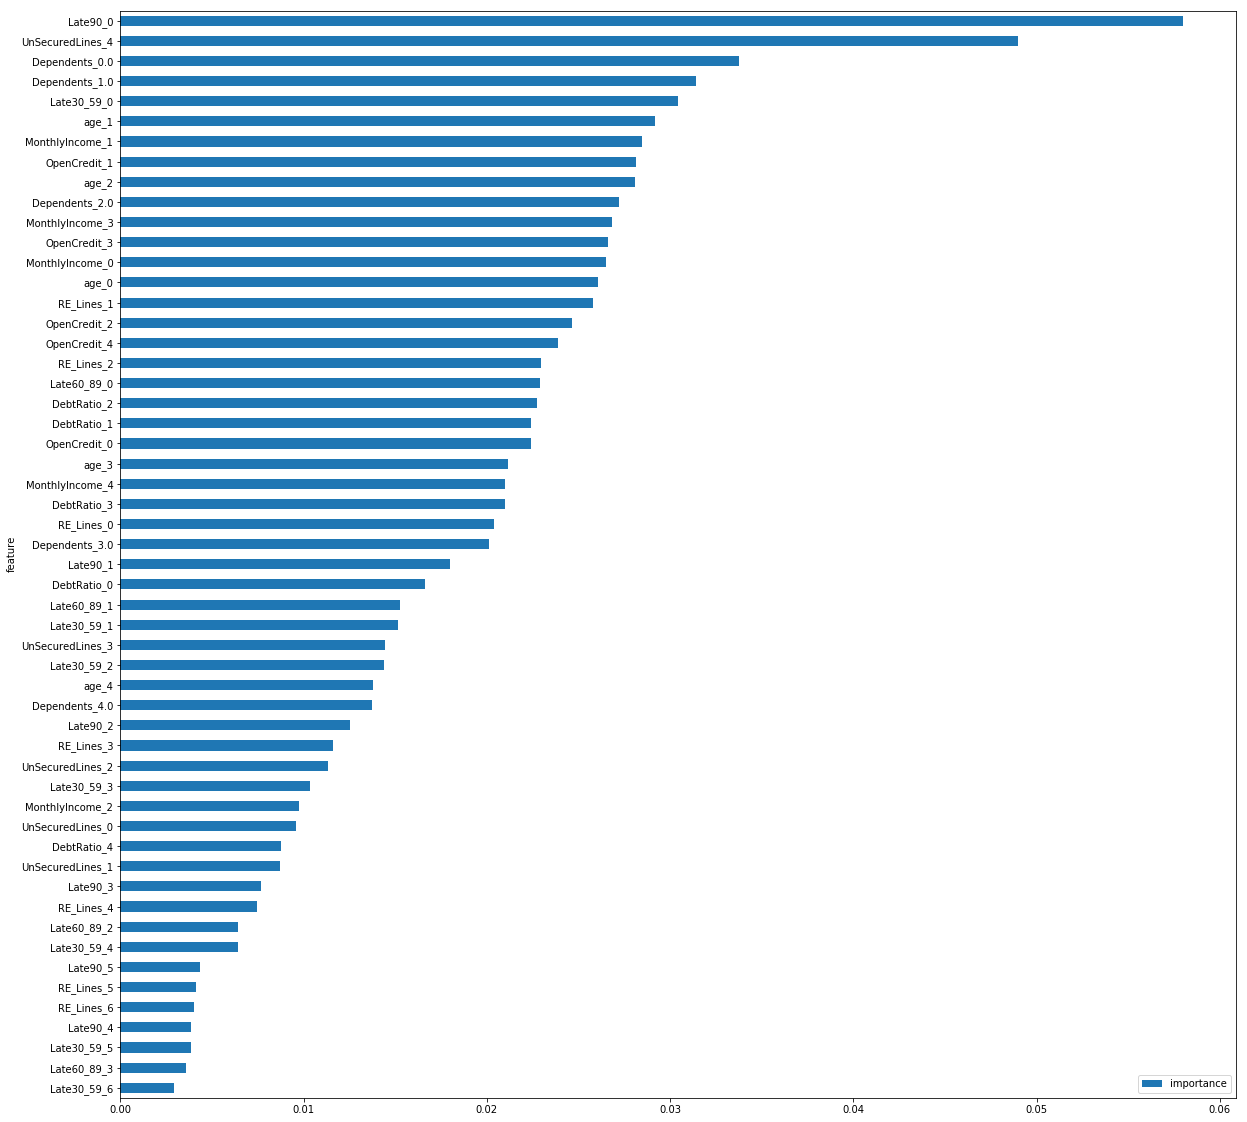

In [139]:
features.plot(kind='barh', figsize=(20, 20))

Random forest classifier model

In [140]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
    
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [141]:
test_data.head(5)

,Id,UnSecuredLines_0,UnSecuredLines_1,UnSecuredLines_2,UnSecuredLines_3,UnSecuredLines_4,age_0,age_1,age_2,age_3,...,RE_Lines_6,Late60_89_0,Late60_89_1,Late60_89_2,Late60_89_3,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Dependents_4.0
146473,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
146474,2,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
146475,3,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
146476,4,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
146477,5,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [150]:
result_data = pd.read_csv("cs-test.csv")

In [151]:
result_data.shape

(101503, 12)

In [152]:
result_data = result_data.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)


In [153]:
PredictProbability = model.predict_proba(test_data.drop(["Id"], axis=1))
PredictProbability = PredictProbability[:,1]
result_data['SeriousDlqin2yrs'] = PredictProbability

result_data = result_data.rename(columns={'Unnamed: 0': 'Id',
                                        'SeriousDlqin2yrs': 'Probability'})

In [154]:
result_data.head()

,Id,Probability
0,1,0.000000
1,2,0.033382
2,3,0.000000
3,4,0.139584
4,5,0.120869


The model is scored using the score algorithm. 

In [164]:
model.score(X_train, Y_train)

0.969496084602623

This model lead to an accuracy rate of 0.9694961 on test data that has not been passed to the model.

This accuracy rate is acceptable given that we used a relatively simple quantile based approach and in light of the fact that no parameter optimization was undertaken earlier.

The result is then save to a csv data called CREDIT_SCORE_DATA.csv

In [147]:
result_data.to_csv("CREDIT_SCORE_DATA.csv", index=False)